# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import matplotlib.pyplot as plt

from tweepy import OAuthHandler
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Read Twitter_archive_data from file
Twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')
Twitter_archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
Twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Use requests to get thef file form website
image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))

current_path = os.getcwd()+'/image_predictions.tsv'

if image_predictions.status_code == 200:
    with open(current_path, 'wb') as file:
        file.write(image_predictions.content)
        print('File downloaded successfully.')
else:
    print('Failed to download the file.')

File downloaded successfully.


In [5]:
image_predictions = pd.read_table('image_predictions.tsv')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

#This take all ID values from the dataset as a key to access each post. 
# tweet_ids = Twitter_archive_data.tweet_id.values 
# len(tweet_ids)

# import traceback for error messages

# count = 0
# fails_dict = {}
# start = timer()

# #### Save each tweet's returned JSON as a new line in a .txt file

# try:
#     with open('tweet_json.txt', 'w') as outfile:
#         # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#         for tweet_id in tweet_ids:
#             count += 1
#             print(str(count) + ": " + str(tweet_id))
#             try:
#                 tweet = api.get_status(tweet_id, tweet_mode='extended')
#                 print("Success")
#                 json.dump(tweet._json, outfile)
#                 outfile.write('\n')
#             except Exception as e:         #The tweepy.TweepError is not longer available, so I changed it. 
#                 print("Fail")
#                 fails_dict[tweet_id] = e
#                 traceback.print_exc() 
#                 pass
# except Exception as e:
#     print("An error occurred:", str(e)) # Display the detail error message.
    
    
# end = timer()
# print(end - start)
# print(fails_dict)

### In above script, I encountered an issue while attempting to access the post details using the "get status" API. Unfortunately, it seems that my current access level is insufficient to retrieve the required information. After conducting further research, it appears that upgrading to a paid developer account is necessary to access more comprehensive data.  I have decided to use the tweet_json file that was provided for this submission. Please advise if there are any alternative solutions or suggestions. 

In [7]:
#Read json file and store into list
tweet_data = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_data.append(tweet)

In [8]:
#Try to see how does the object look like, what does it contain
tweet_data[1]

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w

In [9]:
#convert it to data frame
df_tweet = pd.DataFrame(tweet_data)

In [10]:
df_tweet.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
Twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [14]:
Twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
df_tweet

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


**Try to see if each data frame have duplicate id.**

In [17]:
Twitter_archive_data[Twitter_archive_data.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
df_tweet[df_tweet.id.duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


In [20]:
Twitter_archive_data.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [21]:
image_predictions.tweet_id.value_counts()

666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64

In [22]:
df_tweet.id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
774757898236878852    1
774639387460112384    1
774314403806253056    1
773985732834758656    1
666020888022790149    1
Name: id, Length: 2354, dtype: int64

In [23]:
sum(Twitter_archive_data.rating_denominator.isnull())

0

In [24]:
Twitter_archive_data.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [25]:
Twitter_archive_data.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [26]:
df_tweet.favorite_count.sort_values()

484          0
585          0
164          0
588          0
909          0
         ...  
134     106827
533     107015
65      107956
1037    131075
412     132810
Name: favorite_count, Length: 2354, dtype: int64

In [27]:
df_tweet.retweet_count.sort_values()

290         0
1293        2
273         3
341         3
112         3
        ...  
816     52360
1077    52360
259     56625
533     56625
1037    79515
Name: retweet_count, Length: 2354, dtype: int64

In [28]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [29]:
image_predictions.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
          ...   
1372    0.999953
149     0.999956
1229    0.999962
1299    0.999984
106     1.000000
Name: p1_conf, Length: 2075, dtype: float64

In [30]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [31]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

**What are the unique values in each dog stage column.**

In [32]:
print(Twitter_archive_data['doggo'].unique())

['None' 'doggo']


In [33]:
print(Twitter_archive_data['floofer'].unique())

['None' 'floofer']


In [34]:
print(Twitter_archive_data['pupper'].unique())

['None' 'pupper']


In [35]:
print(Twitter_archive_data['puppo'].unique())

['None' 'puppo']


### Quality issues

1. Some of the post in Twitter_archive_data are retweet, remove the retweet rows. 

2. timestamp column in `Twitter_archive_data`, and created_at column in `df_tweet` table have wrong data type.

3. ID Column in `df_tweet` shoule be changed to tweet_id for consistant.

4. Column name in `image_predictions` data frame shoubl be more clear and reanable.

5. Columns that contain large amount of null values in tweeet_id should be drop.

6. In `Twitter_archive_data` data frame, instead of having null values in the dog stages columns, it takes 'none' as values, change none to null.

7. Rows in `Twitter_archive_data` have incorrect rating nemerator and denominator, regenerate them.

8. Convert rating column in `Twitter_archive_data` to integer.

9. Since some posts have different rating denominator and numerator, adding a column for rating score will help future comparison. rating_score = numerator/denominator.


### Tidiness issues
1.  In `Twitter_archive_data` data frame, the various stages of dog: doggo, pupper, puppo, and floofer can be combined to one column, and change to categorical variable. 

2. `Twitter_archive_data` should be part of the df_tweet data frame.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
Twitter_archive_data_copy = Twitter_archive_data.copy()
image_predictions_copy = image_predictions.copy()
df_tweet_copy = df_tweet.copy()


### Issue #1:

#### Define: 

**Remove the retweet posts by looking for the retweet pattern from text**

**Based on the retweet patterns, retweets are often identified by the "RT @" key words in the tweet text.**

**Also posts that are retweeted will have "retweeted_status_id" or "retweeted_status_user" values as indicated.**

#### Code

In [37]:
#store rows with same retweet patterns into a new data frame for double checking.
#Store rows that do not have the retweet pattern back to the original data frame.
retweet_mask = Twitter_archive_data_copy['text'].str.startswith('RT @')
retweets = Twitter_archive_data_copy[retweet_mask]
Twitter_archive_data_copy= Twitter_archive_data[~retweet_mask]

In [38]:
retweets['text'] ##Post that with retweet pattern. 

19      RT @dog_rates: This is Canela. She attempted s...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36      RT @dog_rates: This is Lilly. She just paralle...
68      RT @dog_rates: This is Emmy. She was adopted t...
73      RT @dog_rates: Meet Shadow. In an attempt to r...
                              ...                        
1023    RT @dog_rates: This is Shaggy. He knows exactl...
1043    RT @dog_rates: Extremely intelligent dog here....
1242    RT @twitter: @dog_rates Awesome Tweet! 12/10. ...
2259    RT @dogratingrating: Exceptional talent. Origi...
2260    RT @dogratingrating: Unoriginal idea. Blatant ...
Name: text, Length: 181, dtype: object

**Test**

In [39]:
#new data frame after remove the retweet posts. 
#columns that indicator the retweet id and user columns are empty now. it works!
Twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2:

#### Define: 

**Change columns timestamp and create_at  to timestamp data type**

#### Code

In [40]:
#Convert tiemstamp and created_at to datetime data type
Twitter_archive_data_copy['timestamp'] = pd.to_datetime(Twitter_archive_data_copy['timestamp'])

/var/folders/6y/w3nxy_w975vb7nbqhvr0lvv00000gn/T/ipykernel_6824/3878048613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Twitter_archive_data_copy['timestamp'] = pd.to_datetime(Twitter_archive_data_copy['timestamp'])


In [41]:
df_tweet_copy['timestamp'] = pd.to_datetime(df_tweet_copy['created_at'])

#### Test

In [42]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [43]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   object             
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #3:

#### Define : 

**Change 'id' Column in `df_tweet` to tweet_id.**

#### Code

In [44]:
#Rename id column 
df_tweet_copy.rename(columns= {'id':'tweet_id'}, inplace=True)

#### Test

In [45]:
list(df_tweet_copy)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status',
 'timestamp']

### Issue #4:

#### Define: 

**Rename the columns in `image_predictions`.**

#### Code

In [46]:
#rename all these columns
image_predictions_copy.rename(columns={'p1_conf':'p1_confident_level', 
                                       'p1_dog': 'p1_result',
                                       'p2_conf': 'p2_confident_level', 
                                       'p2_dog' : 'p2_result', 
                                       'p3_conf':'p3_confident_level', 
                                       'p3_dog': 'p3_result'},inplace=True)

#### Test

In [47]:
list(image_predictions_copy)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_confident_level',
 'p1_result',
 'p2',
 'p2_confident_level',
 'p2_result',
 'p3',
 'p3_confident_level',
 'p3_result']

### Issue #5:

#### Define  

**Columns that contain mostly null values can be drop.**

#### Code

In [48]:
# check which columns we will not use and are going to drop
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   object             
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [49]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [50]:
#Instead of dropping too many columns, I will just take the columns out from the old data frame
df_tweet_copy = df_tweet_copy[['timestamp', 'tweet_id','full_text','retweet_count', 'favorite_count', ]]

In [51]:
Twitter_archive_data_copy = Twitter_archive_data_copy[['tweet_id','timestamp','text','rating_numerator', 'rating_denominator','doggo','floofer','pupper','puppo']]

#### Test

In [52]:
list(df_tweet_copy)

['timestamp', 'tweet_id', 'full_text', 'retweet_count', 'favorite_count']

In [53]:
list(Twitter_archive_data_copy)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #6:

#### Define :

**Change 'none' value to null in Twitter_archive_data_copy. By doing this, can help us melt all these columns about dog stage later**

#### Code

In [54]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   doggo               2175 non-null   object             
 6   floofer             2175 non-null   object             
 7   pupper              2175 non-null   object             
 8   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 169.9+ KB


**Before change to Null in each dog stage column**

In [55]:
print(Twitter_archive_data_copy['doggo'].value_counts())

None     2088
doggo      87
Name: doggo, dtype: int64


In [56]:
print(Twitter_archive_data_copy['floofer'].value_counts())

None       2165
floofer      10
Name: floofer, dtype: int64


In [57]:
print(Twitter_archive_data_copy['puppo'].value_counts())

None     2150
puppo      25
Name: puppo, dtype: int64


In [58]:
print(Twitter_archive_data_copy['pupper'].value_counts())

None      1941
pupper     234
Name: pupper, dtype: int64


In [59]:
#Change the none by filling them to null.
Twitter_archive_data_copy.replace("None", np.nan, inplace=True)

#### Test
**After change to Null values**

In [60]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   doggo               87 non-null     object             
 6   floofer             10 non-null     object             
 7   pupper              234 non-null    object             
 8   puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 169.9+ KB


### Issue #7:

#### Define:
**Reproduct the rating numerator and denominator form the original text.**

#### Code

In [61]:
#Display the full text for checking the rating in posts.
pd.set_option('display.max_colwidth', None)
Twitter_archive_data_copy['text']

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

In [62]:
##Extract the rating from the text in each post text. 
Twitter_archive_data_copy['rating'] = Twitter_archive_data_copy['text'].str.extract(r'(\w*/\w*)')

In [63]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   doggo               87 non-null     object             
 6   floofer             10 non-null     object             
 7   pupper              234 non-null    object             
 8   puppo               25 non-null     object             
 9   rating              2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 186.9+ KB


In [64]:
Twitter_archive_data_copy.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,NaN,NaN,NaN,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,NaN,NaN,NaN,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,NaN,NaN,NaN,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,NaN,NaN,NaN,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,NaN,NaN,NaN,NaN,12/10


In [65]:
#Check if there are any rating contians letter
Twitter_archive_data_copy.rating.sort_values()

1016                0/10
315                 0/10
387               007/10
2261                1/10
1869                1/10
              ...       
1068                9/11
313               960/00
1228               99/90
1815    saddest/sweetest
1249               w/out
Name: rating, Length: 2175, dtype: object

In [66]:
#Check if there are any rating contians letter, 10 misstakes have found.
print(Twitter_archive_data_copy['rating'].value_counts())

12/10               499
10/10               438
11/10               421
13/10               307
9/10                151
8/10                 97
7/10                 50
14/10                43
5/10                 36
6/10                 31
3/10                 18
4/10                 13
2/10                  9
1/10                  7
11/10s                4
9/10s                 4
10/10s                4
4/20                  2
0/10                  2
4/10s                 2
7/10s                 2
420/10                2
6/10s                 1
121/110               1
143/130               1
44/40                 1
26/10                 1
7/11                  1
20/16                 1
45/50                 1
144/120               1
saddest/sweetest      1
88/80                 1
8/10s                 1
60/50                 1
1776/10               1
80/80                 1
84/70                 1
17/10                 1
666/10                1
182/10                1
15/10           

**Base on the index, I display each row that have invaild value of rating, and check what is the actural rating.**

In [67]:
Twitter_archive_data_copy.loc[313].text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [68]:
Twitter_archive_data_copy.loc[1815].text

"This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF"

In [69]:
Twitter_archive_data_copy.loc[1249].text


"What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz"

In [70]:
#Replace all the rating values that contain letter.
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('960/00','13/10')
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('saddest/sweetest','12/10')
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('w/out','3/10')
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('9/10s','9/10')
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('10/10s','10/10')
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('11/10s','11/10')
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('6/10s','6/10')
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('8/10s','8/10')
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('4/10s','4/10')
Twitter_archive_data_copy.rating = Twitter_archive_data_copy.rating.replace('7/10s','7/10')

#### Test

In [71]:
#Check if there are any rating contians letter again
print(Twitter_archive_data_copy['rating'].value_counts())

12/10      500
10/10      442
11/10      425
13/10      308
9/10       155
8/10        98
7/10        52
14/10       43
5/10        36
6/10        32
3/10        19
4/10        15
2/10         9
1/10         7
420/10       2
4/20         2
0/10         2
17/10        1
45/50        1
60/50        1
44/40        1
143/130      1
99/90        1
121/110      1
7/11         1
20/16        1
26/10        1
144/120      1
88/80        1
80/80        1
1776/10      1
50/50        1
204/170      1
9/11         1
165/150      1
27/10        1
75/10        1
24/7         1
84/70        1
007/10       1
11/15        1
15/10        1
182/10       1
666/10       1
1/2          1
Name: rating, dtype: int64


In [72]:
Twitter_archive_data_copy.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,rating
1936,673956914389192708,2015-12-07 20:07:04+00:00,This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd,10,10,NaN,NaN,pupper,NaN,10/10
1354,703631701117943808,2016-02-27 17:24:05+00:00,This is Bella. Based on this picture she's at least 8ft tall (wow)! Must be rare. 11/10 would pet on tippy toes https://t.co/XTVbSRdvcp,11,10,NaN,NaN,NaN,NaN,11/10
1860,675489971617296384,2015-12-12 01:38:53+00:00,RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10 https://t.co/MnTrKaQ8Wn,10,10,NaN,NaN,NaN,NaN,10/10
2028,671866342182637568,2015-12-02 01:39:53+00:00,Meet Dylan. He can use a fork but clearly can't put on a sweatshirt correctly. Looks like a disgruntled teen. 10/10 https://t.co/FWJQ1zQLiI,10,10,NaN,NaN,NaN,NaN,10/10
1472,693942351086120961,2016-01-31 23:42:03+00:00,This is Kobe. He's a Speckled Rorschach. Requests that someone holds his hand during car rides. 10/10 sick interior https://t.co/LCA6Fr3X2M,10,10,NaN,NaN,NaN,NaN,10/10


### Issue #8:

#### Define:

**For better data quality and easier ofr future usem I will melt the rating column and convert it to integer.** 

#### Code

In [73]:
Twitter_archive_data_copy.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   doggo               87 non-null     object             
 6   floofer             10 non-null     object             
 7   pupper              234 non-null    object             
 8   puppo               25 non-null     object             
 9   rating              2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 251.5+ KB


In [74]:
#Split the rating coloumn and store them into the numerator and denominator
Twitter_archive_data_copy['rating_numerator'],Twitter_archive_data_copy['rating_denominator'] = \
                                        Twitter_archive_data_copy['rating'].str.split('/',1).str

/var/folders/6y/w3nxy_w975vb7nbqhvr0lvv00000gn/T/ipykernel_6824/2855651545.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  Twitter_archive_data_copy['rating'].str.split('/',1).str
/var/folders/6y/w3nxy_w975vb7nbqhvr0lvv00000gn/T/ipykernel_6824/2855651545.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Twitter_archive_data_copy['rating_numerator'],Twitter_archive_data_copy['rating_denominator'] = \


In [75]:
#Convert them into integer data type
Twitter_archive_data_copy['rating_numerator'] = Twitter_archive_data_copy['rating_numerator'].astype(int)
Twitter_archive_data_copy['rating_denominator'] = Twitter_archive_data_copy['rating_denominator'].astype(int)

#### Test

In [76]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   doggo               87 non-null     object             
 6   floofer             10 non-null     object             
 7   pupper              234 non-null    object             
 8   puppo               25 non-null     object             
 9   rating              2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 251.5+ KB


In [77]:
Twitter_archive_data_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,NaN,NaN,NaN,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,NaN,NaN,NaN,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,NaN,NaN,NaN,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,NaN,NaN,NaN,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,NaN,NaN,NaN,NaN,12/10


### Issue #9:

#### Define : 
**Adding a column for rating score for better comparison. rating_score = numerator/denominator**

#### Code

In [78]:
#Generate the rating score columns base on the numerator and denominator
Twitter_archive_data_copy['rating_score'] = Twitter_archive_data_copy['rating_numerator'] / Twitter_archive_data_copy['rating_denominator'] 

In [79]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   doggo               87 non-null     object             
 6   floofer             10 non-null     object             
 7   pupper              234 non-null    object             
 8   puppo               25 non-null     object             
 9   rating              2175 non-null   object             
 10  rating_score        2175 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 268.4+ KB


#### Test

In [80]:
list(Twitter_archive_data_copy)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating',
 'rating_score']

In [81]:
Twitter_archive_data_copy.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,rating,rating_score
1220,714606013974974464,2016-03-29 00:12:05+00:00,Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG,12,10,NaN,NaN,NaN,NaN,12/10,1.2
1344,704499785726889984,2016-03-01 02:53:32+00:00,When you wake up from a long nap and have no idea who you are. 12/10 https://t.co/dlF93GLnDc,12,10,NaN,NaN,NaN,NaN,12/10,1.2
576,800859414831898624,2016-11-22 00:32:18+00:00,@SkyWilliams doggo simply protecting you from evil that which you cannot see. 11/10 would give extra pets,11,10,doggo,NaN,NaN,NaN,11/10,1.1
646,793150605191548928,2016-10-31 18:00:14+00:00,This is Nida. She's a free elf. Waited so long for this day. 11/10 https://t.co/3lE8Izgmkf,11,10,NaN,NaN,NaN,NaN,11/10,1.1
2208,668625577880875008,2015-11-23 03:02:14+00:00,This is Maks. Maks just noticed something wasn't right. 10/10 https://t.co/0zBycaxyvs,10,10,NaN,NaN,NaN,NaN,10/10,1.0


### Tidiness issues

### Issue #1:

#### Define :

**Melt doggo, pupper, puppo, and floofer columns into one column and change it to category variable. And drop the columns that will not be use**

#### Code

In [82]:
#We only need one categorical value columns for the dpg stage
Twitter_archive_data_copy['dog_stage'] = (Twitter_archive_data_copy['doggo']
                                          .fillna(Twitter_archive_data_copy['floofer'])
                                          .fillna(Twitter_archive_data_copy['pupper'])
                                          .fillna(Twitter_archive_data_copy['puppo']))

In [83]:
#After combine the columns, convert it to categorical data type

Twitter_archive_data_copy['dog_stage'] = pd.Categorical(Twitter_archive_data_copy['dog_stage'])

In [84]:
#Only keep the necessary columns in the data frame. because df_tweet have all other columns .
Twitter_archive_data_copy = Twitter_archive_data_copy[['tweet_id',
                                                       'timestamp',
                                                       'rating_numerator',
                                                       'rating_denominator',
                                                       'rating_score','dog_stage']]

#### Test

In [85]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   rating_numerator    2175 non-null   int64              
 3   rating_denominator  2175 non-null   int64              
 4   rating_score        2175 non-null   float64            
 5   dog_stage           344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(3)
memory usage: 168.8 KB


In [86]:
Twitter_archive_data_copy.sample(10)

,tweet_id,timestamp,rating_numerator,rating_denominator,rating_score,dog_stage
1240,712085617388212225,2016-03-22 01:16:55+00:00,11,10,1.1,NaN
1520,690728923253055490,2016-01-23 02:53:03+00:00,8,10,0.8,NaN
1027,746056683365994496,2016-06-23 19:05:49+00:00,11,10,1.1,NaN
1743,679405845277462528,2015-12-22 20:59:10+00:00,10,10,1.0,NaN
2163,669375718304980992,2015-11-25 04:43:02+00:00,6,10,0.6,NaN
2314,666701168228331520,2015-11-17 19:35:19+00:00,8,10,0.8,NaN
1132,728760639972315136,2016-05-07 01:37:30+00:00,13,10,1.3,NaN
1972,673240798075449344,2015-12-05 20:41:29+00:00,6,10,0.6,NaN
1766,678399652199309312,2015-12-20 02:20:55+00:00,12,10,1.2,NaN
1159,724046343203856385,2016-04-24 01:24:35+00:00,10,10,1.0,NaN


### Issue #2:

#### Define :

**Twitter_archive_data_copy that contains dog stage and rating infomation shoule be able to combine with the tweet info data frame using tweet id and time that was created.**

#### Code

In [87]:
#Merge the df_tweet_copy and Twitter_archive_data_copy data frame base on the tweet_id and timestamp columns.
tweet_detail = pd.merge(df_tweet_copy,Twitter_archive_data_copy, on=['tweet_id','timestamp'])

#### Test

In [88]:
tweet_detail.head()

,timestamp,tweet_id,full_text,retweet_count,favorite_count,rating_numerator,rating_denominator,rating_score,dog_stage
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467,13,10,1.3,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514,33819,13,10,1.3,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4328,25461,12,10,1.2,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8964,42908,13,10,1.3,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9774,41048,12,10,1.2,NaN


In [89]:
tweet_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2175 non-null   datetime64[ns, UTC]
 1   tweet_id            2175 non-null   int64              
 2   full_text           2175 non-null   object             
 3   retweet_count       2175 non-null   int64              
 4   favorite_count      2175 non-null   int64              
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   rating_score        2175 non-null   float64            
 8   dog_stage           344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(5), object(1)
memory usage: 155.3+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [90]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [120]:
#Since we don't have the image_predictions info from the tweet after Augest 2017, 
#We result in only 1994 rows in the master data frame.
#Merge all data frame together.
twitter_archive_master = pd.merge(tweet_detail,image_predictions_copy, on=['tweet_id'])

In [92]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1994 non-null   datetime64[ns, UTC]
 1   tweet_id            1994 non-null   int64              
 2   full_text           1994 non-null   object             
 3   retweet_count       1994 non-null   int64              
 4   favorite_count      1994 non-null   int64              
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   rating_score        1994 non-null   float64            
 8   dog_stage           306 non-null    category           
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   int64              
 11  p1                  1994 non-null   object             
 12  p1_confident_level  1994 non-null 

In [93]:
twitter_archive_master.head()

,timestamp,tweet_id,full_text,retweet_count,favorite_count,rating_numerator,rating_denominator,rating_score,dog_stage,jpg_url,img_num,p1,p1_confident_level,p1_result,p2,p2_confident_level,p2_result,p3,p3_confident_level,p3_result
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467,13,10,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27+00:00,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514,33819,13,10,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4328,25461,12,10,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8964,42908,13,10,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24+00:00,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9774,41048,12,10,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [94]:
#Save it as the twitter_archive_master csv file to local.
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False )

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:

1. What is the accuracy of the neural network predictions in the sample? That is, excluding specific dog breeds, what percentage of three guesses result in the 'True' answer?


2. For the giving sample(excluding Null), which posts have the highest favorite counts and retweet counts? which dog stage have the highest favorite counts and retweet counts?


3. During the week, which day is the peak time when users post about their dogs? That is: in the sample, which day during the week has the most users posting with ‘WeRateDogs’？

**1. What is the accuracy of the neural network predictions in the sample? That is, excluding specific dog breeds, what percentage of three guesses result in the 'True' answer?**

In [95]:
#Calculate the accuracy by looking for all perdiction that are true devide by the total predictions.

True_pd = len(twitter_archive_master[(twitter_archive_master['p1_result'] == True) & 
                                     (twitter_archive_master['p2_result'] == True) & 
                                     (twitter_archive_master['p3_result'] == True)])
accuracy = True_pd/twitter_archive_master.shape[0]
print('The overall accuray of the prediction of this sample is: ', accuracy)

The overall accuray of the prediction of this sample is:  0.6033099297893681


**2. For the giving sample(excluding Null), which posts have the highest favorite counts and retweet counts? which dog stage have the highest favorite counts and retweet counts?**

In [96]:
twitter_archive_master.describe()

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,rating_score,img_num,p1_confident_level,p2_confident_level,p3_confident_level
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,2766.753260,8895.725677,12.280843,10.532096,1.169249,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,4674.698447,12213.193181,41.497718,7.320710,4.067071,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,16.000000,81.000000,0.000000,2.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,624.750000,1982.000000,10.000000,10.000000,1.000000,1.000000,0.362857,5.393987e-02,1.619283e-02
50%,7.084748e+17,1359.500000,4136.000000,11.000000,10.000000,1.100000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,3220.000000,11308.000000,12.000000,10.000000,1.200000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,79515.000000,132810.000000,1776.000000,170.000000,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [97]:
#Look for which post have the higher favorite count
twitter_archive_master.favorite_count.sort_values()

1977        81
1957       107
1975       108
1989       111
1965       113
         ...  
108     106827
400     107015
58      107956
775     131075
309     132810
Name: favorite_count, Length: 1994, dtype: int64

In [98]:
#Load the image with its url
from IPython.display import Image
image_url = twitter_archive_master.loc[309,'jpg_url']
Image(url=image_url)


In [99]:
#What dog stage is the dog in this post?
dogStage = twitter_archive_master.loc[309,'dog_stage']
dogStage

'puppo'

In [100]:
#Look for which post have the higher retweet count
twitter_archive_master.retweet_count.sort_values()

1977       16
1957       23
1865       34
1975       37
1989       41
        ...  
58      45849
309     48265
810     52360
400     56625
775     79515
Name: retweet_count, Length: 1994, dtype: int64

In [101]:
#Load its image witt url
image_url = twitter_archive_master.loc[775,'jpg_url']
Image(url=image_url)

In [102]:
#What dog stage is the dog in this post?
dogStage = twitter_archive_master.loc[775,'dog_stage']
dogStage

'doggo'

In [103]:
twitter_archive_master.dog_stage.value_counts()

pupper     203
doggo       74
puppo       22
floofer      7
Name: dog_stage, dtype: int64

In [104]:
#Function takes the dog stage as parameter, return its total favorite count.
def total_favorite_count(dogStage):
    total_Fcount = 0
    total_Fcount = twitter_archive_master.query('dog_stage == @dogStage')['favorite_count'].sum()
    return total_Fcount
    

In [105]:
#Function takes the dog stage as parameter, return its total retweet count.
def total_retweet_count(dogStage):
    total_Fcount = 0
    total_Rcount = twitter_archive_master.query('dog_stage == @dogStage')['retweet_count'].sum()
    return total_Rcount

In [106]:
#Call the function and calculate favorite counts of each dog stage
pupper_fv = total_favorite_count('pupper')
doggo_fv = total_favorite_count('doggo')
puppo_fv = total_favorite_count('puppo')
floofer_fv =total_favorite_count('floofer')

In [107]:
#Call the function and calculate retweet counts of each dog stage
pupper_rt = total_retweet_count('pupper')
doggo_rt = total_retweet_count('doggo')
puppo_rt = total_retweet_count('puppo')
floofer_rt = total_retweet_count('floofer')

In [108]:
#funtion take counts and title of each dog stage as parameters, generate the pie chart.
def plotPieChart(values,title):
    labels = ['pupper', 'doggo', 'puppo', 'floofer']
    
    fig, ax = plt.subplots(figsize=(10, 5))

    plt.pie(values,labels = labels, shadow=True, startangle=90,autopct='%1.1f%%')

        # Add a title
    plt.title(title)
    
        #save the chart
    plt.savefig(title)

        # Display the chart
    plt.show()

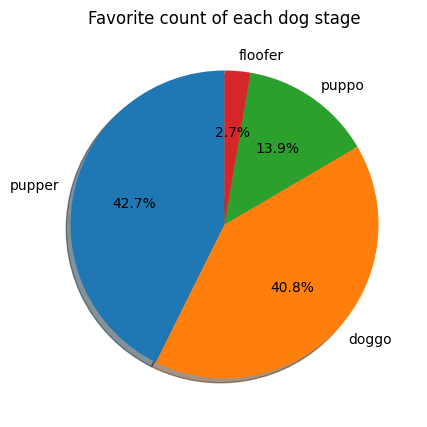

In [109]:
#Pass the values and title into the pie chart function to generate the pei chart
values = [pupper_fv,doggo_fv,puppo_fv,floofer_fv]
plotPieChart(values,title = 'Favorite count of each dog stage')

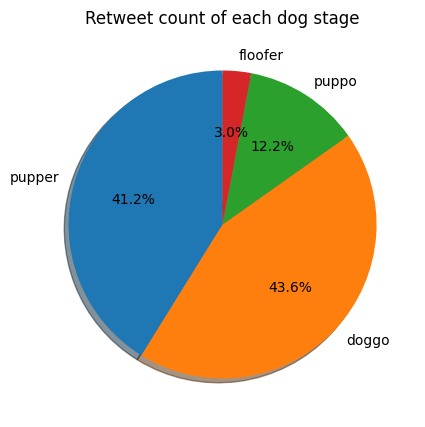

In [110]:
#Pass the values and title into the pie chart function to generate the pei chart
values2 = [pupper_rt,doggo_rt,puppo_rt,floofer_rt]
plotPieChart(values2,title = 'Retweet count of each dog stage')

**3. During the week, which day is the peak time when users post about their dogs? That is: in the sample, which day during the week has the most users posting with ‘WeRateDogs’？**

In [111]:
#Check how does the time column look like
twitter_archive_master['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
1989   2015-11-16 00:24:50+00:00
1990   2015-11-16 00:04:52+00:00
1991   2015-11-15 23:21:54+00:00
1992   2015-11-15 23:05:30+00:00
1993   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 1994, dtype: datetime64[ns, UTC]

In [112]:
#create a new data frame for just the time column.
time_data = twitter_archive_master['timestamp']

In [113]:
#extract the weekday out from the column
time_data = [
        time_data,
        time_data.dt.weekday]

column_labels = ['timestamp','weekday']
time_df = pd.DataFrame(dict(zip(column_labels, time_data)))

In [114]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  1994 non-null   datetime64[ns, UTC]
 1   weekday    1994 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1)
memory usage: 111.3 KB


In [115]:
#replace the number to weekday for readability
time_df['weekday'] = time_df['weekday'].replace(0,'Sunday')
time_df['weekday'] = time_df['weekday'].replace(1,'Monday')
time_df['weekday'] = time_df['weekday'].replace(2,'Tuesday')
time_df['weekday'] = time_df['weekday'].replace(3,'Wednesday')
time_df['weekday'] = time_df['weekday'].replace(4,'Thursday')
time_df['weekday'] = time_df['weekday'].replace(5,'Friday')
time_df['weekday'] = time_df['weekday'].replace(6,'Saturday')

In [116]:
time_df.head()

,timestamp,weekday
0,2017-08-01 16:23:56+00:00,Monday
1,2017-08-01 00:17:27+00:00,Monday
2,2017-07-31 00:18:03+00:00,Sunday
3,2017-07-30 15:58:51+00:00,Saturday
4,2017-07-29 16:00:24+00:00,Friday


In [117]:
print(time_df.weekday.value_counts())

Sunday       327
Tuesday      297
Monday       295
Wednesday    284
Thursday     283
Saturday     256
Friday       252
Name: weekday, dtype: int64


In [118]:
day_post_count = time_df.weekday.value_counts()

### Visualization

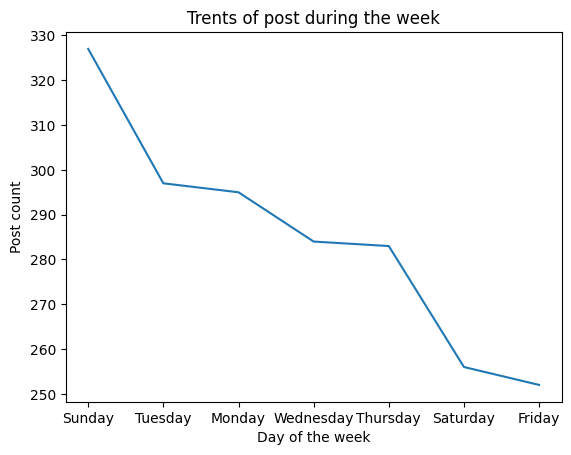

In [119]:
#Only plot the data into line chart.
day_post_count.plot(kind='line')
plt.xlabel('Day of the week')
plt.ylabel('Post count')
plt.title('Trents of post during the week')
#Save the image
plt.savefig('Trents of post during the week.png')
plt.show()